Análisis de Relaciones
===

*Diplomado en Analítica para Mercados de Energía*

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Definición del problema 
---

El [conjunto de datos de la flor Iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos) contiene 150 muestras de las medidas del ancho y el largo del pétalo y del sépalo para las tres especies de esta flor (Iris setosa, Iris virginica e Iris versicolor). A partir de la muestra de datos se desean responder la siguiente pregunta:

* **P4**.--- ¿Qué relación existe entre el largo y el ancho del pétalo y el sépalo?

Carga de datos
---

In [3]:
#
# Se cargan los datos y se realiza una inspección
# inicial de la tabla y los datos
#
iris = sns.load_dataset("iris")

display(iris.head(), iris.tail())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Análisis 
---

In [4]:
iris_melt = pd.melt(
    iris,
    id_vars="species",
    var_name="Variables",
    value_name="Values",
)

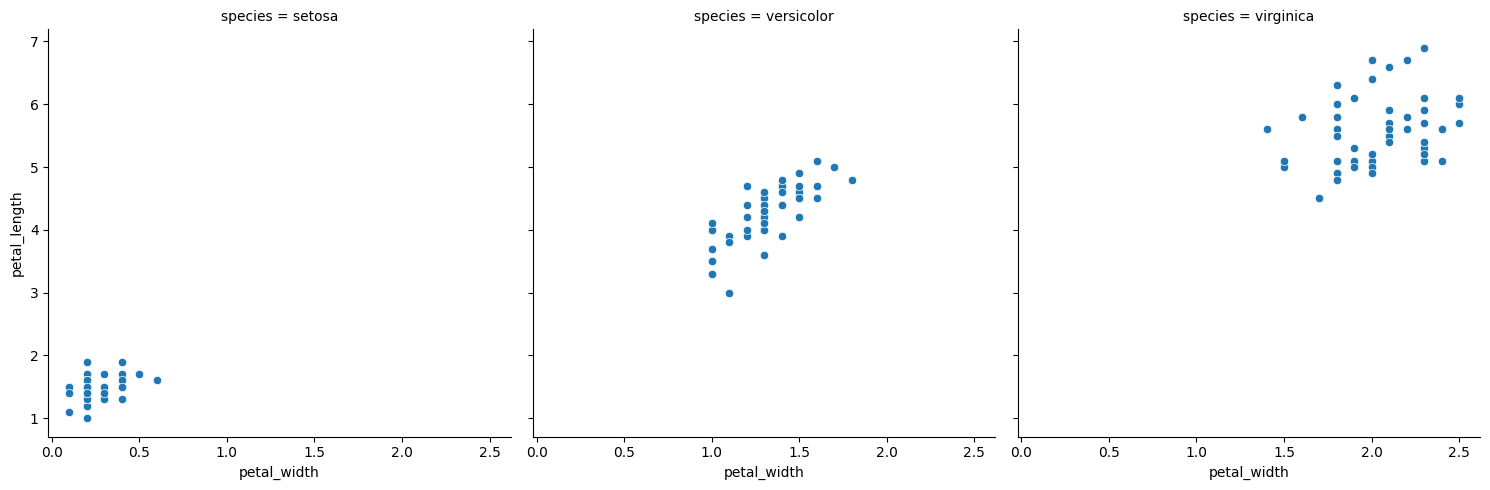

In [5]:
sns.relplot(
    x="petal_width",
    y="petal_length",
    col="species",
    data=iris,
)

plt.show()

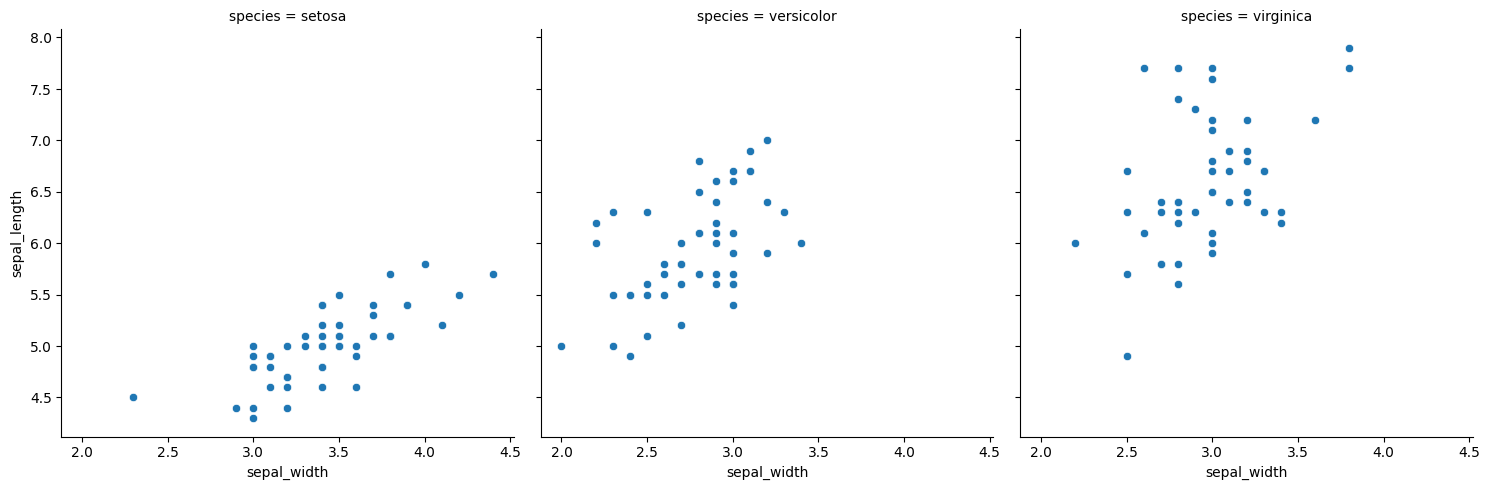

In [6]:
sns.relplot(
    x="sepal_width",
    y="sepal_length",
    col="species",
    data=iris,
)

plt.show()

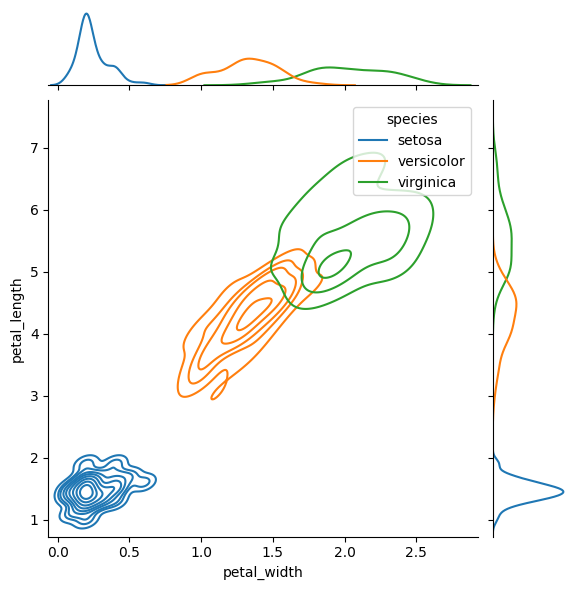

In [7]:
sns.jointplot(
    data=iris,
    x="petal_width",
    y="petal_length",
    hue="species",
    kind="kde",
)
plt.show()

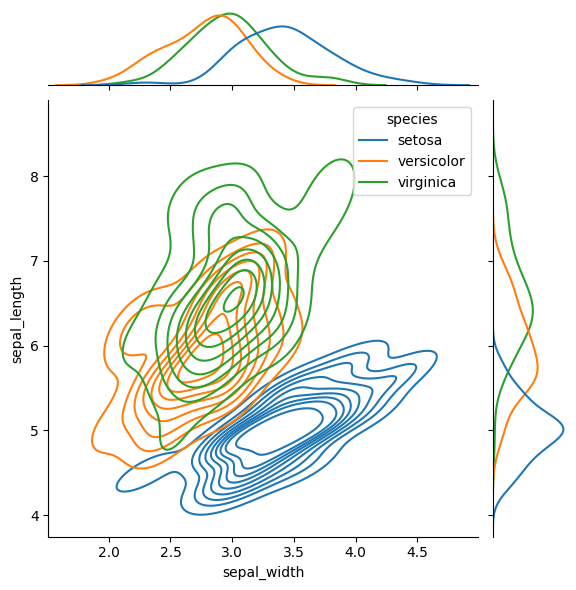

In [8]:
sns.jointplot(
    data=iris,
    x="sepal_width",
    y="sepal_length",
    hue="species",
    kind="kde",
)
plt.show()

**Covarianza**

$$
\text{Cov}(x, y) = 
\frac{1}{n-1}
\sum_{i=1}^n  (x_i - \bar{x}) (y_i - \bar{y})
$$

![covariance.png](assets/covariance.png)

In [9]:
np.cov(iris.petal_length, iris.sepal_length)

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

In [10]:
iris.cov(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


**Coeficiente de correlación** 

Métrica que representa la dependencia entre una variable y otra. El coeficiente de correlación de Pearson $r$ entre dos variables $x$ y $y$ se calcula como:

$$r=\frac{\sum_{i=1}^n  (x_i - \bar{x}) (y_i - \bar{y})}
         {(n-1)\; s_X \; s_Y}$$


La correlación va entre $-1$ (correlación perfecta negativa) y $+1$ (correlación perfecta positiva). Un valor de $0$ indica que no hay correlación.

In [11]:
np.corrcoef(iris.sepal_length, iris.petal_length)

array([[1.        , 0.87175378],
       [0.87175378, 1.        ]])

**Matriz de correlación**

Matriz donde cada fila y cada columna corresponde a una variable, y los elementos corresponden a la correlación entre las respectivas variables.

In [12]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


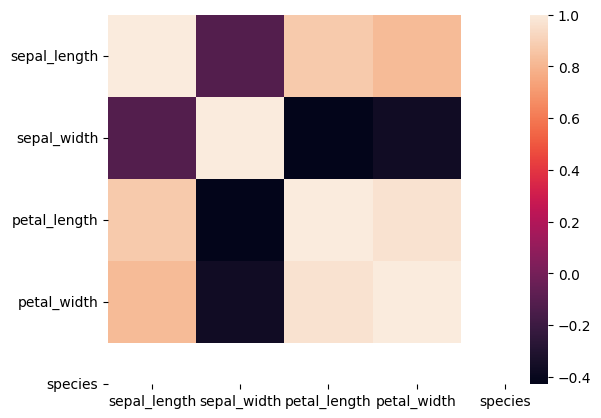

In [13]:
sns.heatmap(
    iris.corr(numeric_only=True),
    xticklabels=iris.columns.values,
    yticklabels=iris.columns.values,
)
plt.show()

**Regresión**

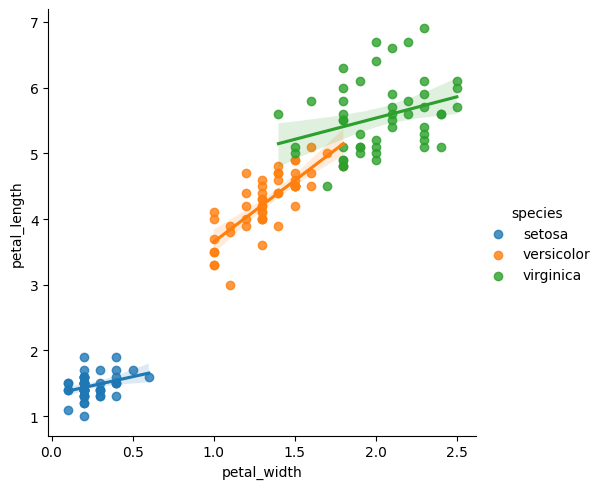

In [14]:
sns.lmplot(
    x="petal_width",
    y="petal_length",
    data=iris,
    hue="species",
)

plt.show()

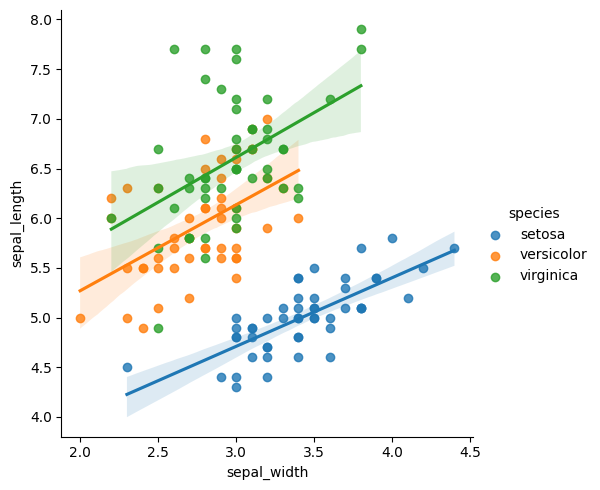

In [15]:
sns.lmplot(
    x="sepal_width",
    y="sepal_length",
    data=iris,
    hue="species",
)

plt.show()